In [5]:
import pandas as pd

pop=pd.read_excel('phl_population-2020_2025.xlsx')
pop.to_csv('phl_population-2020_2025.csv', index=False)
print('Done')

Done


In [9]:
import pandas as pd

#Loading both data sets
pop=pd.read_csv('phl_population-2020_2025.csv')
eq=pd.read_csv('phivolcs_earthquake_data.csv')

pop.rename(columns={'Municipality_City': 'City'}, inplace=True)

eq.rename(columns={'Specific_Location': 'City'}, inplace=True)

pop['City'] = pop['City'].str.strip()
eq['City'] = eq['City'].str.strip()

pop['City'] = pop['City'].str.lower()
eq['City'] = eq['City'].str.lower()

eq['Date_Time_PH'] = pd.to_datetime(eq['Date_Time_PH']).dt.date

eq['Date_Time_PH'] = pd.to_datetime(eq['Date_Time_PH'])

eq.rename(columns={'Date_Time_PH': 'Date'}, inplace=True)

eq["Depth_In_Km"] = pd.to_numeric(eq["Depth_In_Km"], errors="coerce")

eq_1=eq[~eq["Date"].dt.year.isin([2016, 2017, 2018, 2019])]

pop_clean=pop.to_csv('Phl_Ppl-2020-2025_Clean.csv',index=False)

eq_clean=eq_1.to_csv('Earthquake_Data_Clean.csv',index=False)

print('Done')

Done


In [3]:
#Merging two data sets
import pandas as pd

#Calling to data sets
pop_clean=pd.read_csv('Phl_Ppl-2020-2025_Clean.csv')
eq_clean=pd.read_csv('Earthquake_Data_Clean.csv')

#merging two data sets on 'City' column
merged = pd.merge(pop_clean, eq_clean, on='City', how='inner')


#Saving into csv
merged.to_csv('Merged_DS.csv', index=False)
print('Done')
#merged

Done


In [15]:
import pandas as pd

merged = pd.read_csv("Merged_DS.csv")

merged['Date'] = pd.to_datetime(merged['Date'])

merged['year'] = merged['Date'].dt.to_period('Y')

merged.columns = [c.strip().lower() for c in merged.columns]


yearly_stats = merged.groupby(['city', 'year']).agg(
    min_mag=('magnitude', 'min'),
    max_mag=('magnitude', 'max'),
    frequency=('magnitude', 'count')
).reset_index()

final_df = pd.merge(yearly_stats,merged.drop_duplicates(subset=['city']),  # add population + region only once
    on='city',
    how='left'
)


final_df = final_df.drop(columns=['region','region_pcode','province_pcode','mun_pcode','province','latitude','longitude','depth_in_km','magnitude','location','general_location','date','year_y'])
final_df.to_csv("year_stats.csv", index=False)
final_df.head()

,city,year_x,min_mag,max_mag,frequency,july2020,july2021,july2022,july2023,july2024,july2025
0,abra de ilog,2020,1.4,4.8,121,32596,32801,32986,33151,33297,33423
1,abra de ilog,2021,1.5,5.8,92,32596,32801,32986,33151,33297,33423
2,abra de ilog,2022,1.5,5.3,109,32596,32801,32986,33151,33297,33423
3,abra de ilog,2023,1.3,5.1,125,32596,32801,32986,33151,33297,33423
4,abra de ilog,2024,1.4,4.9,134,32596,32801,32986,33151,33297,33423


In [35]:
# Removing extra population columns and adding one column for population
import pandas as pd

final_df = pd.read_csv("year_stats.csv")

final_df.columns = [c.strip().lower() for c in final_df.columns]

if "year_x" in final_df.columns:
    final_df = final_df.rename(columns={"year_x": "year"})

population_map = {
    2020: "july2020",
    2021: "july2021",
    2022: "july2022",
    2023: "july2023",
    2024: "july2024",
    2025: "july2025"
}

def assign_population(row):
    year = int(row["year"])
    if year in population_map:
        pop_col = population_map[year]
        return row[pop_col]
    return None

final_df["population"] = final_df.apply(assign_population, axis=1)

final_df = final_df.drop(columns=["july2020","july2021","july2022","july2023","july2024","july2025"])

final_df.to_csv("Final_Data.csv", index=False)

print("Population column generated successfully!")

Population column generated successfully!


In [17]:
import pandas as pd
from scipy.stats import pearsonr

final_df = pd.read_csv("Final_Data.csv")  

df_clean = final_df[['population', 'frequency']].dropna()

corr, p_value = pearsonr(df_clean['population'], df_clean['frequency'])

print("Correlation:", corr)
print("P-value:", p_value)

if p_value < 0.05:
    print("Result: Bigger cities DO have significantly more earthquakes (reject H0).")
else:
    print("Result: No significant evidence that bigger cities have more earthquakes (fail to reject H0).")


Correlation: -0.026794730574281944
P-value: 0.07783619262538237
Result: No significant evidence that bigger cities have more earthquakes (fail to reject H0).


In [19]:
import pandas as pd
final_df = pd.read_csv("Final_Data.csv")  
final_df.describe()

,year,min_mag,max_mag,frequency,population
count,4332.000000,4332.000000,4332.000000,4332.000000,4.332000e+03
mean,2022.619575,1.863135,3.028163,29.461219,4.571030e+04
std,1.711942,0.481537,0.964000,143.977499,5.146919e+04
min,2020.000000,1.000000,1.100000,1.000000,1.345000e+03
25%,2021.000000,1.500000,2.300000,2.000000,2.077025e+04
50%,2023.000000,1.800000,2.900000,4.000000,3.512850e+04
75%,2024.000000,2.100000,3.600000,14.000000,5.694350e+04
max,2025.000000,5.100000,7.500000,4680.000000,1.827910e+06


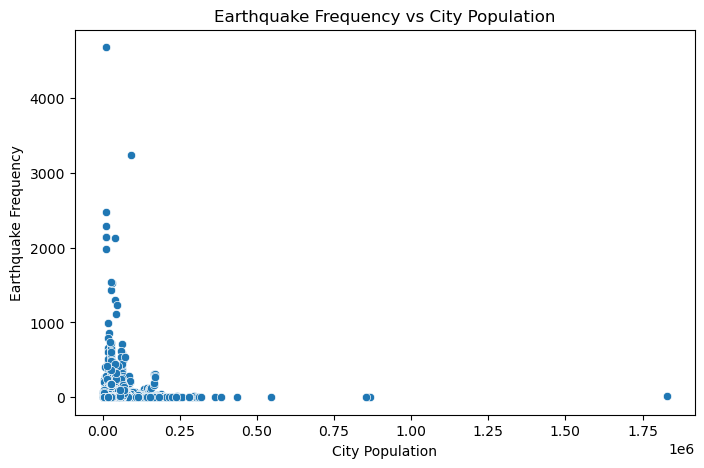

In [21]:
#Plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


final_df = pd.read_csv("Final_Data.csv")  

plt.figure(figsize=(8,5))
sns.scatterplot(x='population', y='frequency', data=final_df)
plt.title("Earthquake Frequency vs City Population")
plt.xlabel("City Population")
plt.ylabel("Earthquake Frequency")
plt.show()

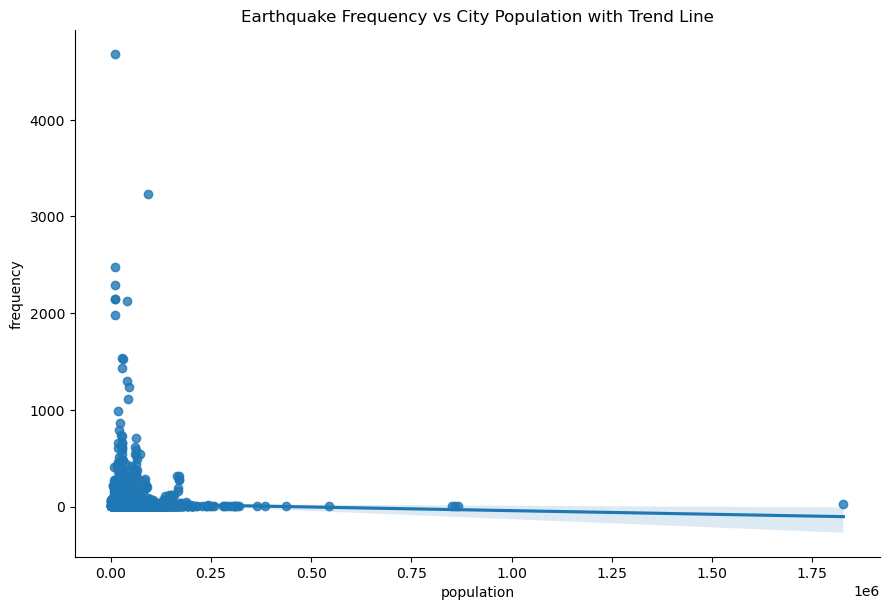

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

final_df = pd.read_csv("Final_Data.csv")  

sns.lmplot(x='population', y='frequency', data=final_df, height=6, aspect=1.5)
plt.title("Earthquake Frequency vs City Population with Trend Line")
plt.show()

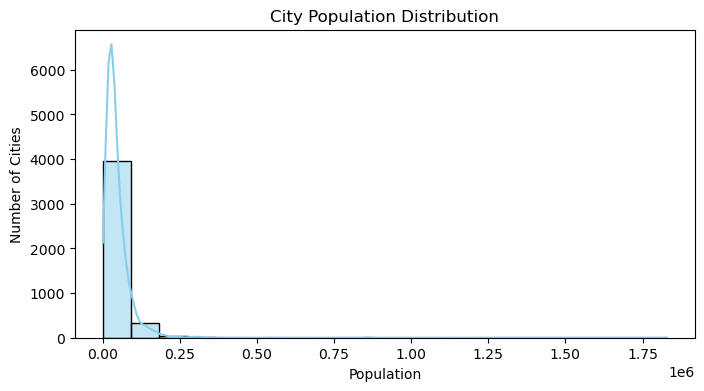

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


final_df = pd.read_csv("Final_Data.csv")  

plt.figure(figsize=(8,4))
sns.histplot(final_df['population'], bins=20, kde=True, color='skyblue')
plt.title("City Population Distribution")
plt.xlabel("Population")
plt.ylabel("Number of Cities")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(final_df['frequency'], bins=20, kde=True, color='salmon')
plt.title("Earthquake Frequency Distribution")
plt.xlabel("Number of Earthquakes")
plt.ylabel("Number of Cities")
plt.show()

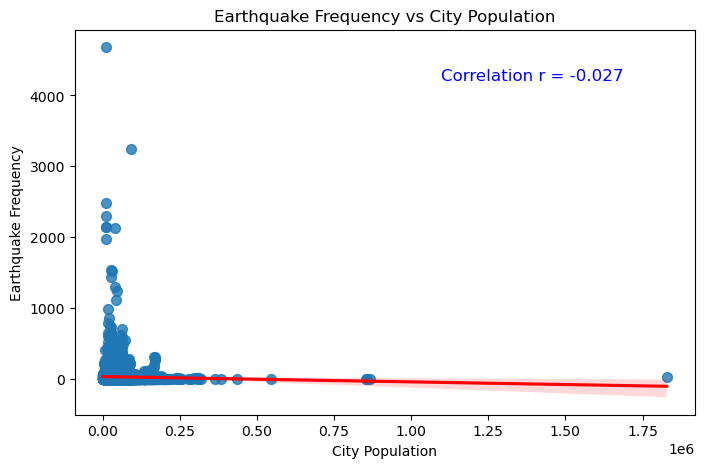

In [7]:
#. Scatter Plot with Correlation Coefficient Annotated

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

final_df = pd.read_csv("Final_Data.csv")  


# Calculate correlation
corr, p_value = pearsonr(final_df['population'], final_df['frequency'])

# Scatter plot with regression line
plt.figure(figsize=(8,5))
sns.regplot(x='population', y='frequency', data=final_df, scatter_kws={'s':50}, line_kws={'color':'red'})

# Add correlation coefficient text
plt.text(x=final_df['population'].max()*0.6, 
         y=final_df['frequency'].max()*0.9, 
         s=f"Correlation r = {corr:.3f}", 
         fontsize=12, color='blue')

plt.title("Earthquake Frequency vs City Population")
plt.xlabel("City Population")
plt.ylabel("Earthquake Frequency")
plt.show()

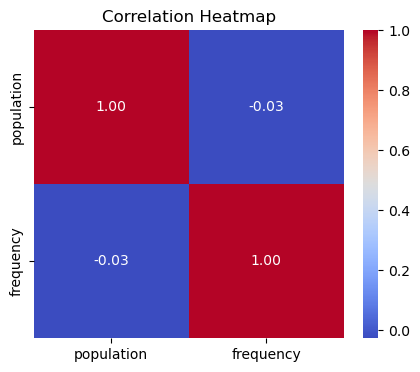

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


final_df = pd.read_csv("Final_Data.csv")
corr_matrix = final_df[['population', 'frequency']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()